In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e7/sample_submission.csv
/kaggle/input/playground-series-s4e7/train.csv
/kaggle/input/playground-series-s4e7/test.csv


# Setup 

In [3]:
!pip install --pre pycaret
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 4.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 13.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 51.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 19.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 79.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 83.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

In [4]:
# for some model interpretation functions
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 31.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 182.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 77.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 66.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.8/778.8 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 12.9 MB/s eta 0:00:00
  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.1-py3-none-any.whl size=4010600 sha256=bc0e93e2ae2163e45333adef484b837fcbbe13b9459ab094c34cda5412f6a476
  Stored in directory: /root/.cache/pip/wheels/2b/86/e6/a00e9295bb80ac2d86b93b9cbf5ba1ae78e9f739d75398e41f
Successfully built dash-cytoscape


In [5]:
from pycaret.utils import version
version()

'3.3.2'

In [6]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px

plt.rcParams["figure.figsize"] = (7, 5)  # Change matplotlib Box Size
plt.rcParams["font.size"] = 10  # Change matplotlib Font Size
plt.style.use("fivethirtyeight")

In [7]:
import warnings
warnings.simplefilter('ignore')

In [8]:
df_train_raw = pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv',index_col=0)
df_test_raw = pd.read_csv('/kaggle/input/playground-series-s4e7/test.csv',index_col=0)

In [9]:
data = df_train_raw.copy()
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [10]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Vehicle_Age'] = data['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
data['Vehicle_Damage'] = data['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

In [11]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
0,1,21,1,35.0,0,1,1,65101.0,124.0,187,0
1,1,43,1,28.0,0,2,1,58911.0,26.0,288,1
2,0,25,1,14.0,1,0,0,38043.0,152.0,254,0
3,0,35,1,1.0,0,1,1,2630.0,156.0,76,0
4,0,36,1,15.0,1,1,0,31951.0,152.0,294,0


# EDA

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                int64  
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           int64  
 6   Vehicle_Damage        int64  
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(8)
memory usage: 1.0 GB


In [13]:
data.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [14]:
data.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.413510e-01,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,6.031073e-01,5.026798e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,4.982872e-01,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,5.678559e-01,4.999928e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,0.000000e+00,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,1.000000e+00,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,1.000000e+00,1.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,1.000000e+00,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.000000e+00,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,2.000000e+00,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


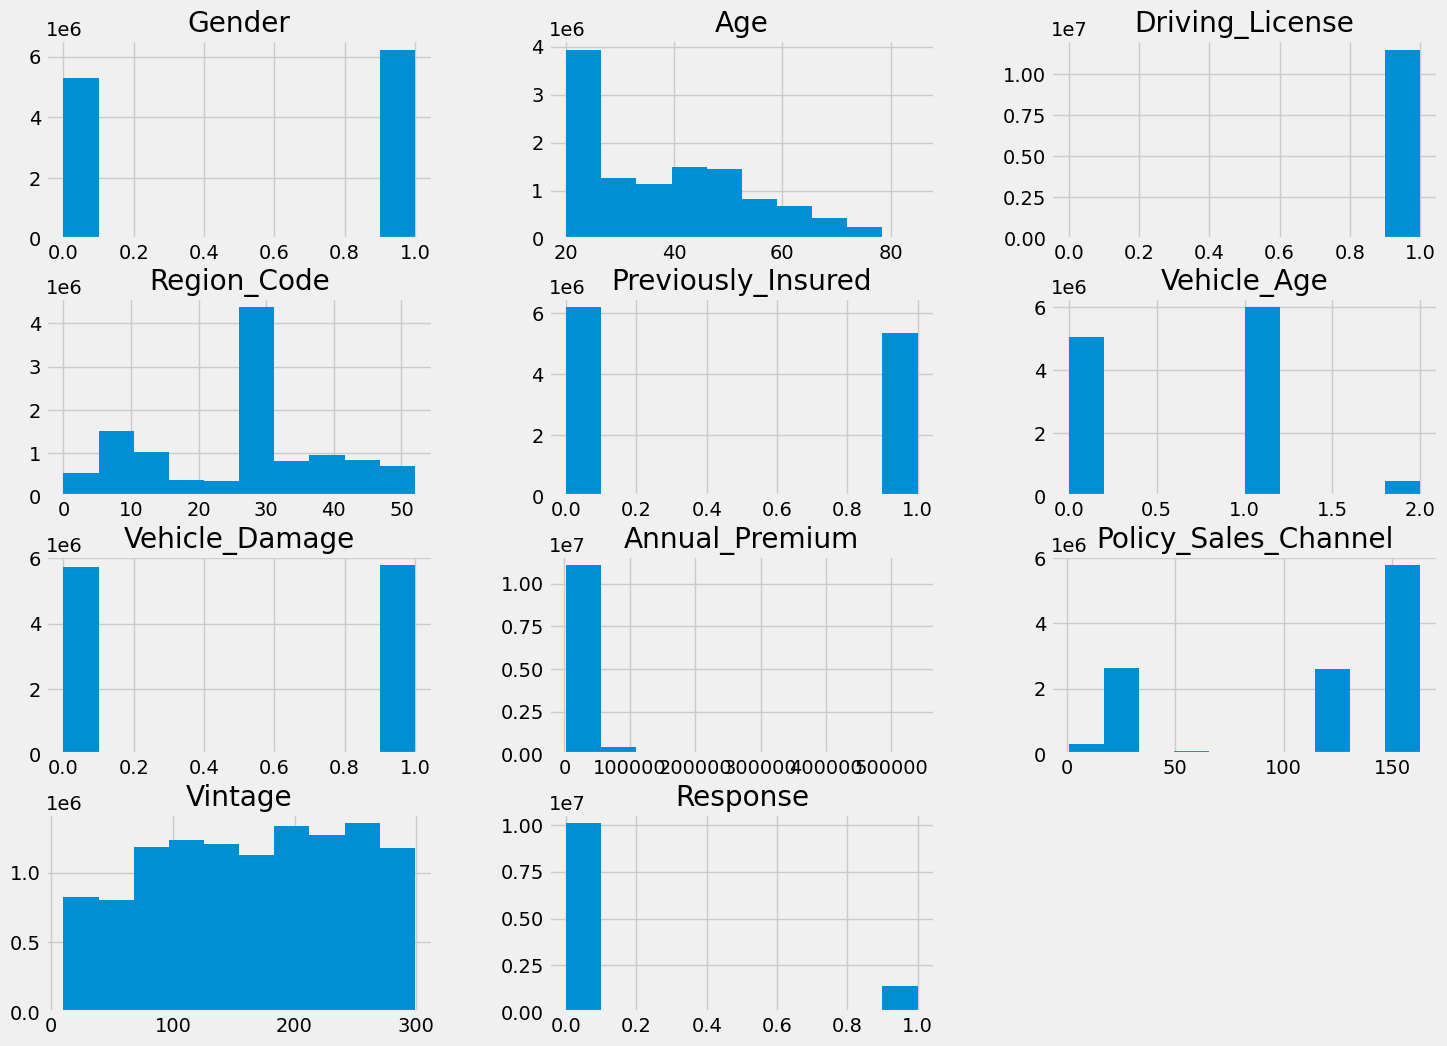

In [15]:
data.hist(figsize=(16, 12));

## data preparation

In [16]:
np.mean(data['Annual_Premium']), np.median(data['Annual_Premium'])

(30461.370410588694, 31824.0)

In [17]:
data['Annual_Premium'] = np.where(data['Annual_Premium'] > 32000, 1, 0)

In [18]:
data_sample= data.sample(frac=0.025, random_state=42)
data_sample

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
2899125,0,41,1,28.0,0,1,1,0,157.0,46,0
3854901,0,40,1,28.0,0,1,1,1,13.0,245,0
7377384,1,31,1,18.0,0,0,1,0,152.0,31,0
10901782,0,24,1,37.0,1,0,0,0,152.0,217,0
8099641,1,33,1,28.0,1,1,0,1,124.0,286,0
...,...,...,...,...,...,...,...,...,...,...,...
7212347,0,50,1,38.0,0,1,1,1,124.0,98,1
5944779,0,28,1,28.0,1,0,0,1,152.0,181,0
10779580,0,21,1,14.0,1,0,0,0,152.0,258,0


## Prepare Datasets

In [19]:
X = data_sample.drop(columns=['Response'], axis=1)
y = data_sample['Response']
X.shape, y.shape

((287620, 10), (287620,))

In [20]:
y.value_counts()

Response
0    252271
1     35349
Name: count, dtype: int64

In [21]:
X.shape, y.shape

((287620, 10), (287620,))

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape

((230096, 10), (57524, 10), (230096,))

In [23]:
X_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
10038217,1,23,1,50.0,1,0,0,1,152.0,296
2787465,1,26,1,18.0,0,0,1,0,153.0,68
7726940,0,38,1,28.0,1,1,0,1,124.0,127
9242559,1,22,1,15.0,1,0,0,1,152.0,261
10628562,0,66,1,46.0,0,1,1,0,11.0,132


## Initialize Setup

In [24]:
from pycaret.classification import *

clf = setup(data=pd.concat([X_train, y_train], axis=1),
            target = 'Response',
            session_id=13,
            max_encoding_ohe=600, # columns with 600 or less categories will be One-hot encoded ELSE target encoding
            rare_to_value=0.008, # Categories with less than 0.008 (0.8%) of the data will be grouped into a new category (Other)
            rare_value='Other',
            fix_imbalance = True,
            experiment_name='swiss1',
            normalize = True,
            log_experiment = True,
            n_jobs=-1)

,Description,Value
0,Session id,13
1,Target,Response
2,Target type,Binary
3,Original data shape,"(230096, 11)"
4,Transformed data shape,"(351725, 11)"
5,Transformed train set shape,"(282696, 11)"
6,Transformed test set shape,"(69029, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


2024/07/14 14:35:01 INFO mlflow.tracking.fluent: Experiment with name 'swiss1' does not exist. Creating a new experiment.


In [25]:
get_config('pipeline')

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Gender', 'Age', 'Driving_License',
                                             'Region_Code',
                                             'Previously_Insured',
                                             'Vehicle_Age', 'Vehicle_Damage',
                                             'Annual_Premium',
                                             'Policy_Sales_Channel',
                                             'Vintage'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty...
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('balance',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=FixImbalancer(estimator=SMOTE(k_neighbors=5,
                                                                              n_jobs=None,
                                                                              random_state=13,
                                                                              sampling_strategy='auto')))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True)))],
         verbose=False)

In [26]:
# check the original data going into Pycaret
X_tr = get_config('X_train')
X_tr.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
9723354,0,35,1,28.0,0,1,0,0,124.0,79
3326589,0,34,1,9.0,1,1,0,0,26.0,133
8270403,0,45,1,13.0,0,1,0,1,152.0,44
3765543,0,46,1,28.0,1,1,0,1,122.0,137
6943734,0,53,1,28.0,0,1,1,0,26.0,62


In [27]:
# check how pycaret transforms the data
X_tr2 = get_config('X_train_transformed')
X_tr2.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
9723354,-1.236931,-0.402909,0.043809,0.115041,-0.602092,0.446931,-1.573759,-1.127538,0.380616,-1.050687
3326589,-1.236931,-0.475365,0.043809,-1.437464,1.664527,0.446931,-1.573759,-1.127538,-1.369463,-0.370237
8270403,-1.236931,0.321659,0.043809,-1.110621,-0.602092,0.446931,-1.573759,0.987307,0.880638,-1.491719
3765543,-1.236931,0.394116,0.043809,0.115041,1.664527,0.446931,-1.573759,0.987307,0.344900,-0.319833
6943734,-1.236931,0.901314,0.043809,0.115041,-0.602092,0.446931,0.642018,-1.127538,-1.369463,-1.264902


In [28]:
X_tr2.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

## Train and Compare Models

In [29]:
best_models = compare_models(fold=5,
                             sort='F1',
                             n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7958,0.8514,0.6668,0.3332,0.4444,0.3359,0.3663,19.7320
ada,Ada Boost Classifier,0.7756,0.8423,0.7123,0.3156,0.4372,0.3223,0.3641,5.8400
lr,Logistic Regression,0.6410,0.8365,0.9785,0.2516,0.4003,0.2552,0.3757,1.8320
nb,Naive Bayes,0.6404,0.8282,0.9803,0.2515,0.4003,0.2552,0.3762,0.4780
qda,Quadratic Discriminant Analysis,0.6404,0.8406,0.9803,0.2515,0.4003,0.2552,0.3762,0.5000
ridge,Ridge Classifier,0.6398,0.8362,0.9805,0.2512,0.4000,0.2547,0.3759,0.4660
lda,Linear Discriminant Analysis,0.6398,0.8362,0.9805,0.2512,0.4000,0.2547,0.3759,0.5300
svm,SVM - Linear Kernel,0.6394,0.8126,0.9811,0.2511,0.3999,0.2545,0.3759,0.7500
xgboost,Extreme Gradient Boosting,0.8550,0.8599,0.3602,0.3980,0.3781,0.2963,0.2968,2.2660
lightgbm,Light Gradient Boosting Machine,0.8553,0.8598,0.3436,0.3954,0.3677,0.2864,0.2874,3.6620


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [35]:
best_models

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=13, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=13),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    ra

In [36]:
best_model = best_models[0]

## create modell

In [37]:
gbc = create_model('gbc', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7995,0.8537,0.6509,0.3356,0.4429,0.3355,0.3629
1,0.7947,0.8520,0.6841,0.3346,0.4494,0.3410,0.3740
2,0.7941,0.8495,0.6637,0.3303,0.4411,0.3318,0.3622
3,0.7953,0.8499,0.6689,0.3328,0.4444,0.3358,0.3666
4,0.7956,0.8520,0.6666,0.3329,0.4440,0.3355,0.3659
Mean,0.7958,0.8514,0.6668,0.3332,0.4444,0.3359,0.3663
Std,0.0019,0.0015,0.0106,0.0018,0.0028,0.0029,0.0042


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Tune Model Hyperparameters

In [40]:
param_grid = {
    'learning_rate': [0.01],
    'n_estimators': [1500],
    'max_depth': [4],
    'min_samples_split': [40],
    'min_samples_leaf': [7],
    'max_features': [4],
    'subsample': [0.95]
}


In [41]:
# Tune the model
tuned_gbc = tune_model(gbc, custom_grid=param_grid)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8180,0.8592,0.5918,0.3543,0.4432,0.3425,0.3586
1,0.8159,0.8572,0.5882,0.3500,0.4389,0.3371,0.3534
2,0.8171,0.8557,0.5766,0.3501,0.4356,0.3342,0.3490
3,0.8167,0.8579,0.6085,0.3550,0.4484,0.3475,0.3657
4,0.8195,0.8588,0.6040,0.3590,0.4503,0.3505,0.3675
5,0.8124,0.8522,0.5796,0.3427,0.4308,0.3272,0.3434
6,0.8144,0.8570,0.5923,0.3483,0.4387,0.3364,0.3534
7,0.8152,0.8525,0.5809,0.3474,0.4348,0.3326,0.3483
8,0.8118,0.8560,0.5816,0.3421,0.4308,0.3270,0.3436


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1 candidates, totalling 10 fits


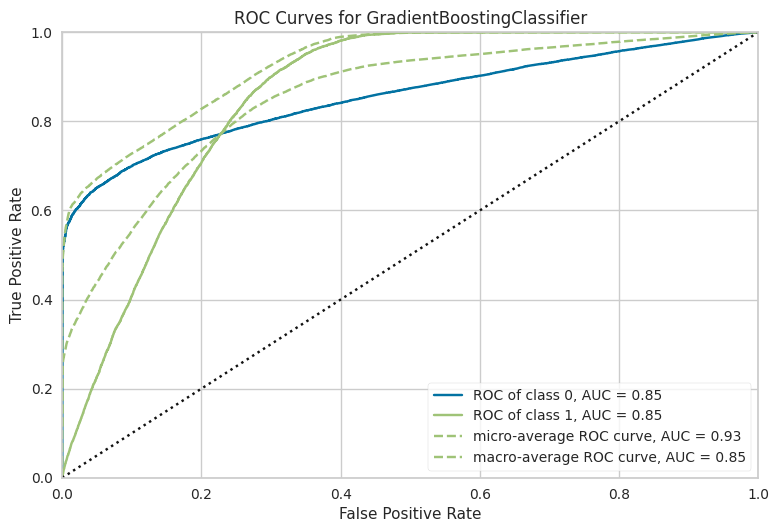

In [44]:
plot_model(tuned_gbc)

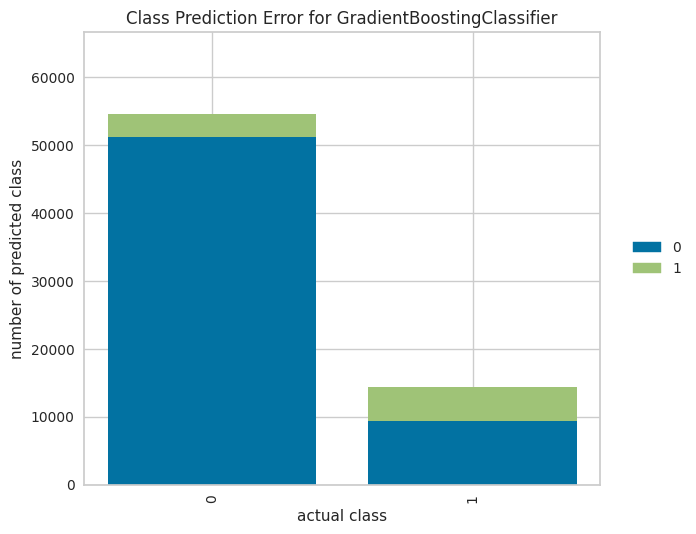

In [42]:
plot_model(tuned_gbc, plot='error')

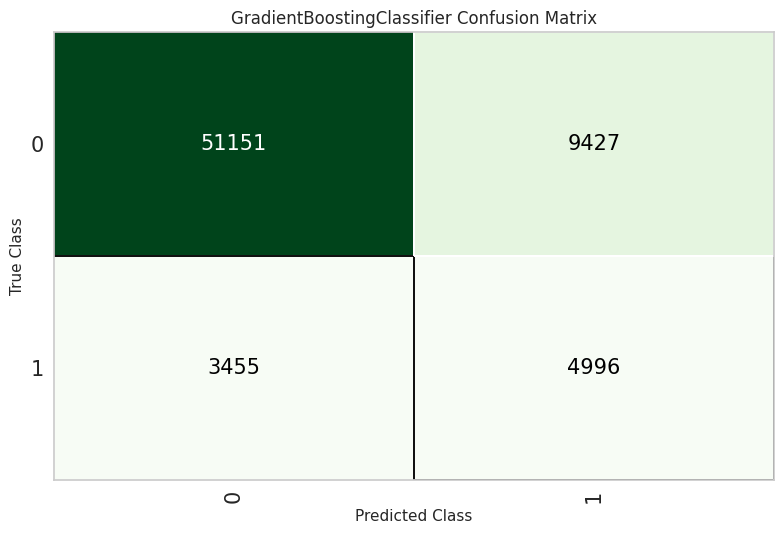

In [43]:
plot_model(tuned_gbc, plot='confusion_matrix')

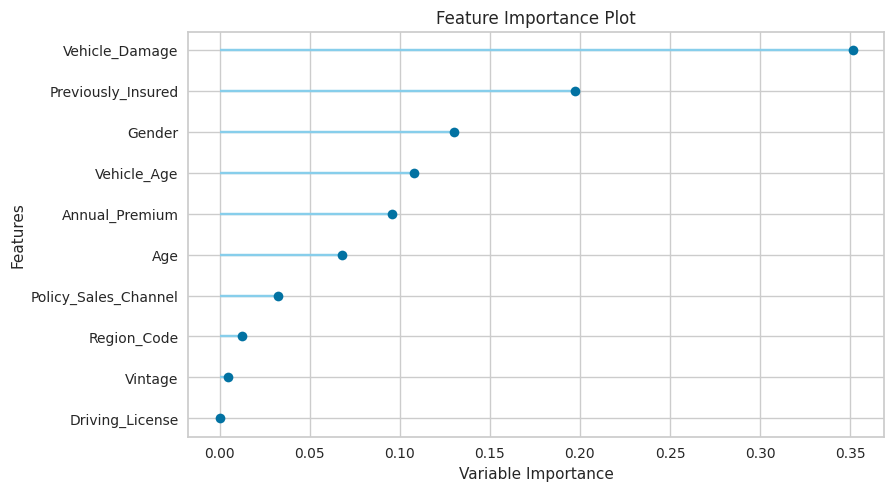

In [45]:
plot_model(tuned_gbc, plot='feature')